# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

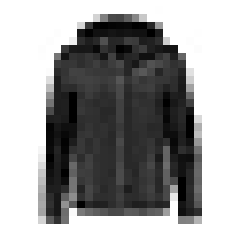

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

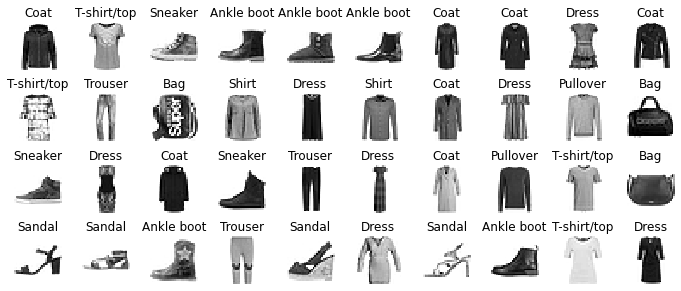

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.06017876, -0.03034269,  0.06313749, ..., -0.01885954,
        -0.04719825, -0.05258735],
       [ 0.06523305,  0.03486721, -0.02306302, ..., -0.0190316 ,
        -0.05955869,  0.06813382],
       [ 0.01324498,  0.04208964,  0.06381424, ..., -0.02811719,
        -0.03622616, -0.06280336],
       ...,
       [-0.04881514,  0.0541148 ,  0.05533236, ..., -0.06674824,
        -0.03850679, -0.04522418],
       [ 0.03062519,  0.04627439,  0.0401773 , ...,  0.02248191,
         0.04132424,  0.04554048],
       [ 0.04385062, -0.06134373,  0.01634301, ...,  0.04278418,
        -0.03738581,  0.06402791]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7340 - accuracy: 0.7539 - val_loss: 0.5314 - val_accuracy: 0.8096
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4884 - accuracy: 0.8302 - val_loss: 0.4472 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8450 - val_loss: 0.4072 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4160 - accuracy: 0.8544 - val_loss: 0.4089 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3966 - accuracy: 0.8605 - val_loss: 0.4173 - val_accuracy: 0.8482
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8649 - val_loss: 0.3656 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8698 - val_loss: 0.3596 - val_accuracy

In [30]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

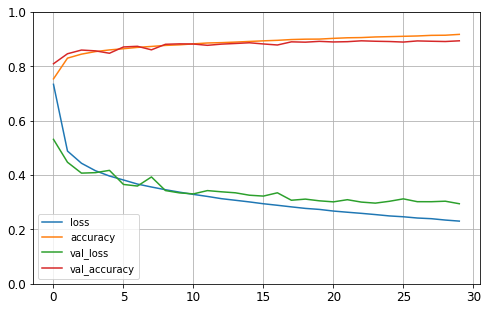

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8830


[0.3286452293395996, 0.8830000162124634]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.01, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
# y_pred = model.predict_classes(X_new)    This function was removed in TensorFlow version 2.6 !
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

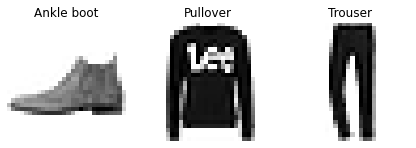

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

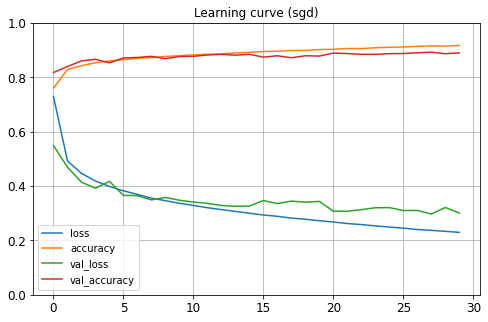

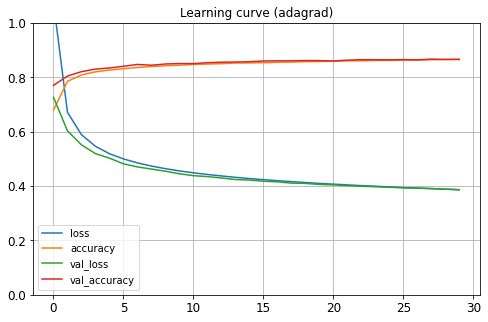

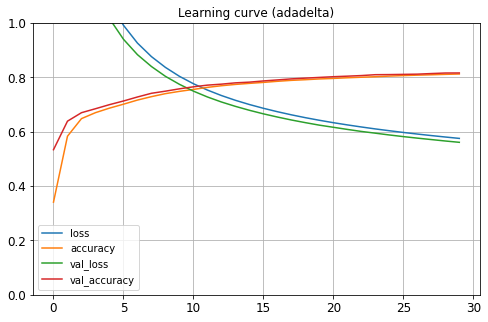

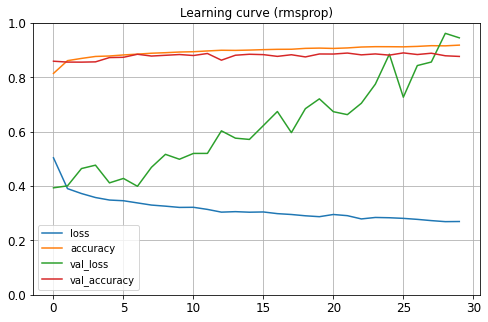

In [41]:
#1) Plotting Learning curves when using different optimizers

import pandas as pd

def plot_learning_curves_optimizer(optimizer):

  
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer= optimizer,
              metrics=["accuracy"])

  history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title("Learning curve ("+optimizer+")")
  plt.gca().set_ylim(0, 1)
  plt.show()

optimizer_dict = {"SGD": "sgd", "Adagrad" : "adagrad", "Adadelta": "adadelta", "RMSprop" : "rmsprop"}

for op in optimizer_dict.values():
  plot_learning_curves_optimizer(op)

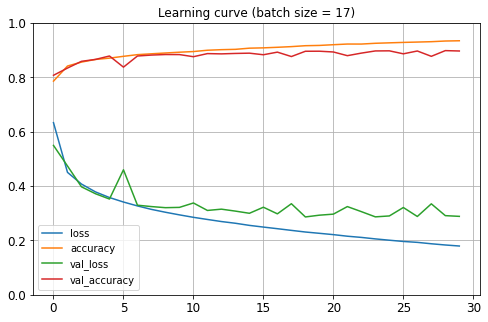

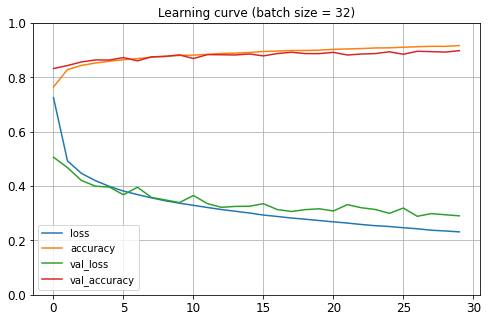

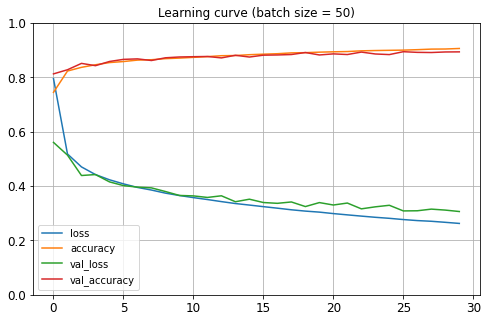

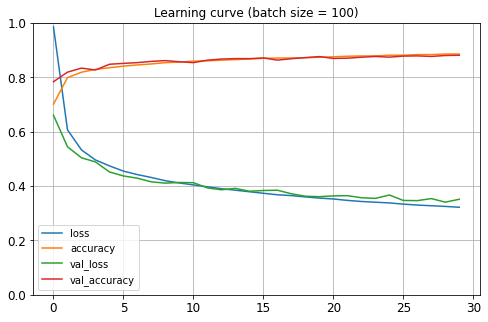

In [42]:
#1) Plotting Learning curves when using different batch sizes


def plot_learning_curves_batch(batch):

  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics=["accuracy"])

  history = model.fit(X_train, y_train, batch_size=batch, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title("Learning curve (batch size = "+str(batch)+")")
  plt.gca().set_ylim(0, 1)
  plt.show()

batch_sizes = [17, 32, 50, 100]

for batch in batch_sizes:
  plot_learning_curves_batch(batch)

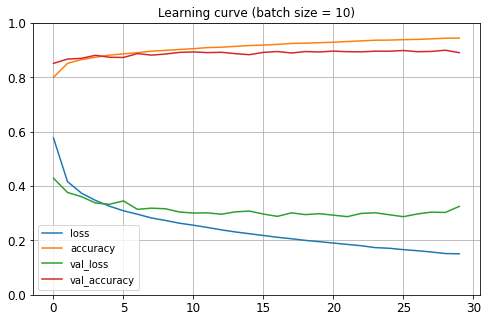

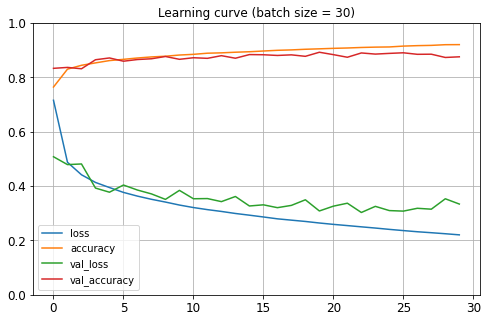

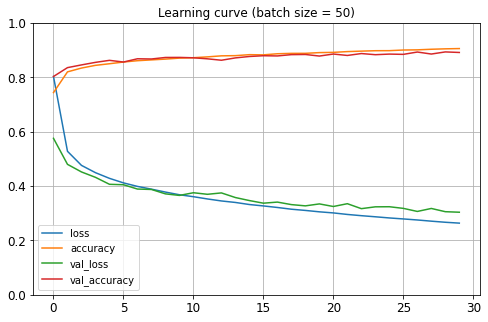

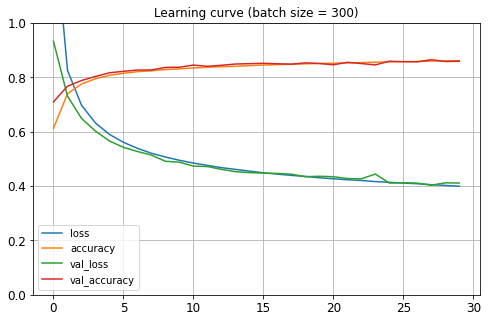

In [43]:
#3) Plotting Learning curves when using different number of epochs


def plot_learning_curves_epochs(epoch):
  
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics=["accuracy"])

  history = model.fit(X_train, y_train, batch_size=32, epochs=epoch,
                    validation_data=(X_valid, y_valid), verbose=0)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title("Learning curve (number of epochs = "+str(epoch)+")")
  plt.gca().set_ylim(0, 1)
  plt.show()

batch_sizes = [10, 30, 50, 300]

for batch in batch_sizes:
  plot_learning_curves_batch(batch)

In [ ]:
# 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(600, activation="relu"))
model2.add(keras.layers.Dense(200, activation="relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(20, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Learning curve")
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
# 5) Use Batch Normalisation

model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(600, activation="relu"))
model3.add(keras.layers.Dense(200, activation="relu"))
model3.add(keras.layers.Dense(20, activation="softmax"))
model3.add(keras.BatchNormalization())

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])d


history = model3.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Learning curve")
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
# 6) repeat with more layers

model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
model4.add(keras.layers.Dense(600, activation="relu"))
model4.add(keras.layers.Dense(400, activation="relu"))
model4.add(keras.layers.Dense(200, activation="relu"))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(20, activation="softmax"))
model4.add(keras.BatchNormalization())

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])d


history = model4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Learning curve")
plt.gca().set_ylim(0, 1)
plt.show()
